<a href="https://colab.research.google.com/github/vridhikamboj1/project/blob/main/boston%20housing%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**importing libraries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**loading the data set**

In [3]:
from sklearn.datasets import load_boston
boston_dataset = load_boston()
dataset = pd.DataFrame(boston_dataset.data, columns = boston_dataset.feature_names)

In [4]:
dataset

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


**getting our target variable i.e medv**

In [5]:
dataset['MEDV'] = boston_dataset.target


**checking for the null values**

In [6]:
dataset.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

**describing the data to know about the max ,min,mean values**

In [14]:
dataset.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


this shows that 75 percent of the data lies below 25 and the max value is 50

**checking the outliers present in our dataset**

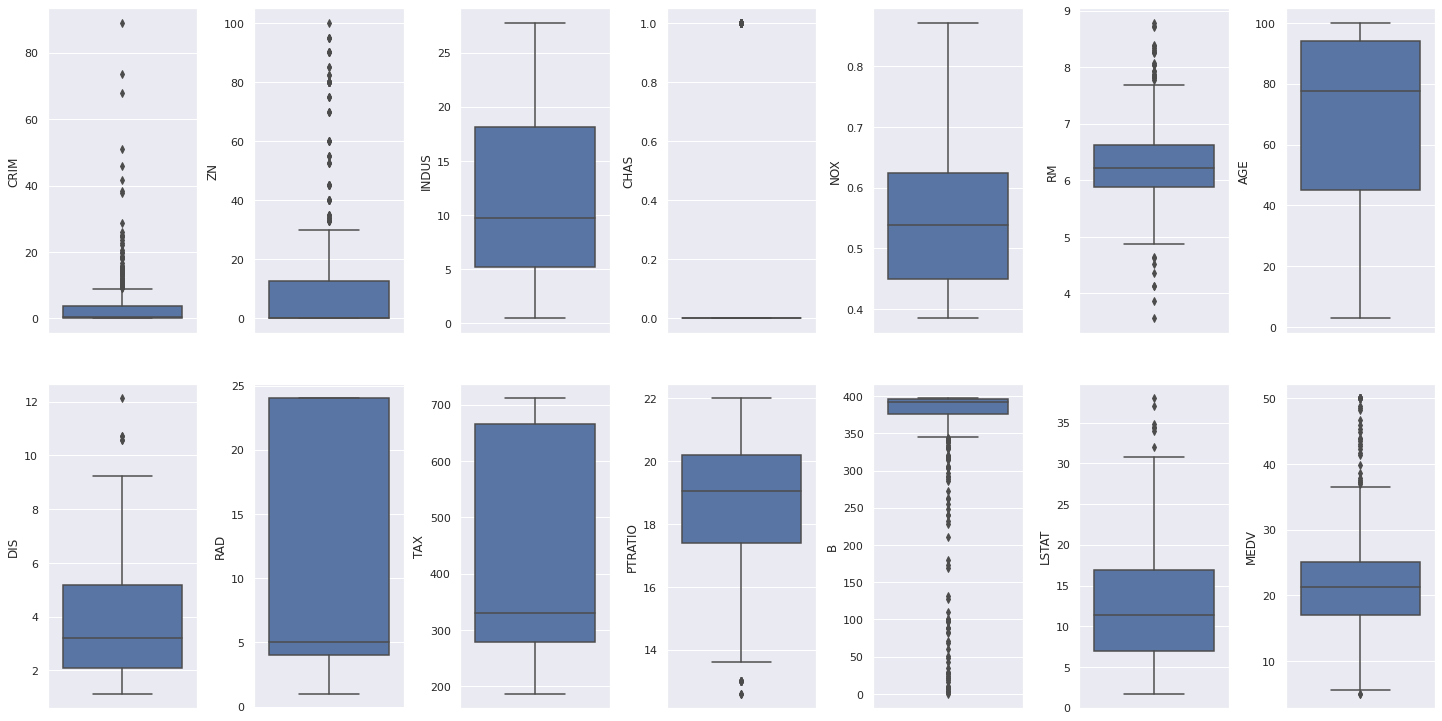

In [20]:
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
count = 0
axs = axs.flatten()
for tar,var in dataset.items():
    sns.boxplot(y=tar, data=dataset, ax=axs[count])
    count= count+1
plt.tight_layout(pad=0.5, w_pad=0.78, h_pad=4.0)

We can see a large number of outliers in CRIM, ZN, RM, B. Lets check the percentage of their outlier.

In [22]:
#outliers in percentage
for tar,var in dataset.items():
    q1=var.quantile(0.25)
    q3=var.quantile(0.75)
    iqr=q3-q1
    var_col=var[(var<=q1-1.5*iqr) | (var>=q3+1.5*iqr)]
    perc=np.shape(var_col)[0]*100.0/np.shape(dataset)[0]
    print("Column %s outliers = %.2f%%" % (tar, perc))  

Column CRIM outliers = 13.04%
Column ZN outliers = 13.44%
Column INDUS outliers = 0.00%
Column CHAS outliers = 100.00%
Column NOX outliers = 0.00%
Column RM outliers = 5.93%
Column AGE outliers = 0.00%
Column DIS outliers = 0.99%
Column RAD outliers = 0.00%
Column TAX outliers = 0.00%
Column PTRATIO outliers = 2.96%
Column B outliers = 15.22%
Column LSTAT outliers = 1.38%
Column MEDV outliers = 7.91%


we see that the crim,zn and b has larger percentage of an outliers

**heatmap to check the correlation between the variables**

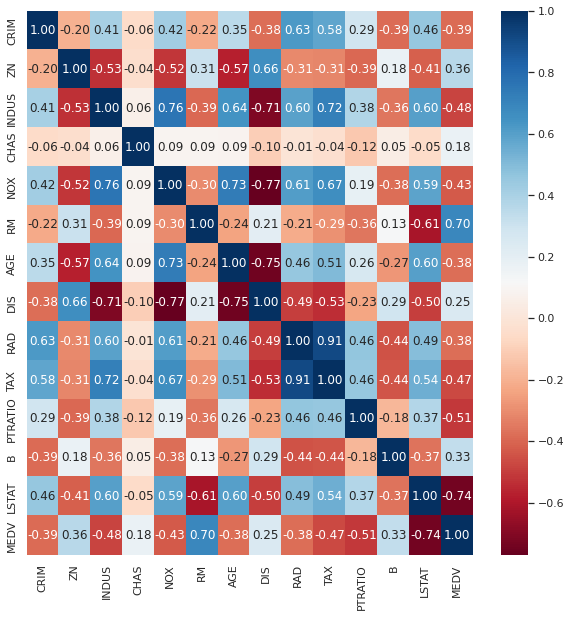

In [ ]:
corr = dataset.corr()
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corr, cmap='RdBu', annot=True, fmt=".2f")


from the correlation matrix RM,LSTAT,TAX,NOX,INDUS,PTRATIO is correlated with medv TAX 

**model building**

In [37]:
from sklearn.metrics import r2_score
def performance_metric(y_true,y_predict):
  score=r2_score(y_true,y_pred)
  return score

**selecting our feauture and the target variable**

In [24]:
x=dataset.drop('MEDV',axis=1)
y=dataset.MEDV

**linear regression**

In [33]:
from sklearn.linear_model import LinearRegression

In [27]:
scores=[]

In [28]:
lr=LinearRegression()

**cross  validation**

In [29]:
from sklearn.model_selection import KFold,cross_val_predict

**splitinf the data into 3 folds**

In [30]:
kf=KFold(shuffle=True,random_state=72018,n_splits=3)
for  train_index,test_index in kf.split(x):
  print('train_index:',train_index[:10],len(train_index))
  print('test_index:',test_index[:10],len(test_index))
  print('')

train_index: [ 1  3  4  5  7  8 10 11 12 13] 337
test_index: [ 0  2  6  9 15 17 19 23 25 26] 169

train_index: [ 0  2  6  9 10 11 12 13 15 17] 337
test_index: [ 1  3  4  5  7  8 14 16 22 27] 169

train_index: [0 1 2 3 4 5 6 7 8 9] 338
test_index: [10 11 12 13 18 20 21 24 28 31] 168



In [34]:
from sklearn import metrics

In [38]:
for train_index,test_index in kf.split(x):
  x_train,x_test,y_train,y_test=(x.iloc[train_index,:],x.iloc[test_index,:],y[train_index],y[test_index])
  lr.fit(x_train,y_train)
  y_pred=lr.predict(x_test)
  score=r2_score(y_test.values,y_pred)
  scores.append(score)
  scores


In [39]:
scores

[0.6715488905723952, 0.7485800157971645, 0.6976436939974671]

In [40]:
kf

KFold(n_splits=3, random_state=72018, shuffle=True)

In [41]:
from sklearn.pipeline import Pipeline


In [42]:
from sklearn.preprocessing import StandardScaler

In [43]:
a=StandardScaler()

In [44]:
estimator=Pipeline([ ('scaler',a),('regression',lr)])

In [45]:
predictions=cross_val_predict(estimator,x,y,cv=kf)

In [46]:
len(predictions)

506

In [47]:
r2_score(y,predictions)

0.706230873245282

In [48]:
np.mean(scores)


0.7059242001223422

**ridge and lasso regression**

In [52]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

**generating the sequence of alphas**

In [49]:
alphas=np.geomspace(1e-9,1e0,num=10)

In [50]:
alphas

array([1.e-09, 1.e-08, 1.e-07, 1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02,
       1.e-01, 1.e+00])

In [53]:
coef=[]
for alpha in alphas:
  las=Lasso(alpha=alpha,max_iter=10000)
  estimator=Pipeline([('scalar',a),('lasso_regression',las)])

In [54]:
predictions=cross_val_predict(estimator,x,y,cv=kf)

In [55]:
score=r2_score(y,predictions)

In [56]:
score

0.6512230278052343

**lasso regression r2 score came out to be less than the linear regression **

**now i will work with ridge regression**

In [57]:
coef=[]
for alpha in alphas:
  ridge=Ridge(alpha=alpha,max_iter=10000)
  estimator=Pipeline([('scalar',a),('ridge',ridge)])

In [58]:
predictions=cross_val_predict(estimator,x,y,cv=kf)
score=r2_score(y,predictions)

In [59]:
score

0.7066197965083774

ahh! this is giving a good r2 score 

In [60]:
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [61]:
estimator=Pipeline([('scalar',a),('linear',lr)])

In [62]:
predictions=cross_val_predict(estimator,x,y,cv=kf)

In [63]:
score=r2_score(y,predictions)

In [64]:
score

0.706230873245282

**model** **validation**

1.Linear Relationship: In linear regression the relationship between the dependent and independent variable to be linear. This can be checked by scatter ploting Actual value Vs Predicted value

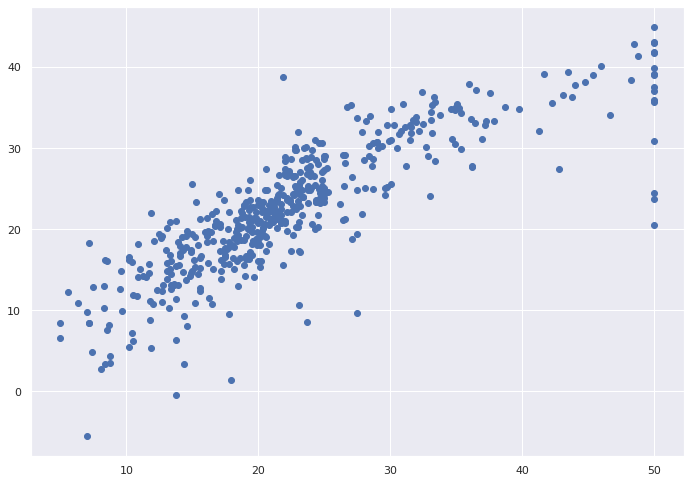

In [65]:
plt.scatter(y, predictions)

near regession assumes that there is little or no Multicollinearity in the data. Multicollinearity occurs when the independent variables are too highly correlated with each other. The variance inflation factor VIF* identifies correlation between independent variables and strength of that correlation. VIF=1/(1−R^2) , If VIF=1 no correlation, If VIF >1 & VIF <5 moderate correlation, VIF > 5 critical level of multicollinearity.

VIF=3.408 indicating that it is moderately collinear

3.The residual error plot should be normally distributed.
4.The mean of residual error should be 0 or close to 0 as much as possible

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


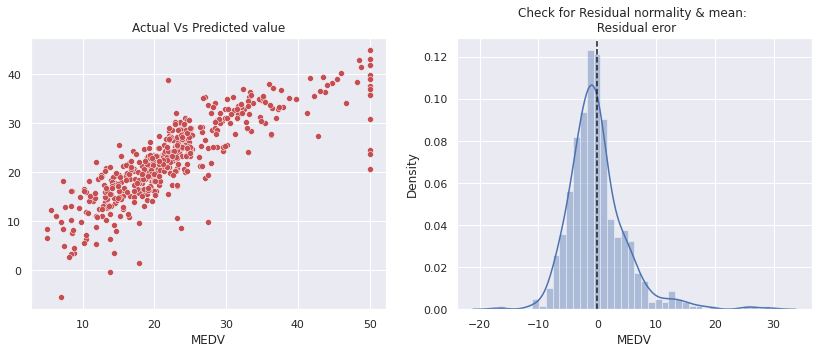

In [67]:
#Plotting Actual observations vs predicted observations
import matplotlib.pyplot as plt 
import seaborn as sns
f = plt.figure(figsize=(14,5))
ax = f.add_subplot(121)
sns.scatterplot(y,predictions,ax=ax,color='r')
ax.set_title('Actual Vs Predicted value')

# Check for Residual normality & mean
ax = f.add_subplot(122)
a=(y - predictions)
sns.distplot(a,ax=ax,color='b')
ax.axvline(a.mean(),color='k',linestyle='--')
ax.set_title('Check for Residual normality & mean: \n Residual eror');

Actual vs Predicted price is linear in nature.
Residuals are normally distributed and it follows normality assumptions.
VIF<5 so moderately correlated. **bold text** **bold text**

**to check homoscedasticity **bold text**

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


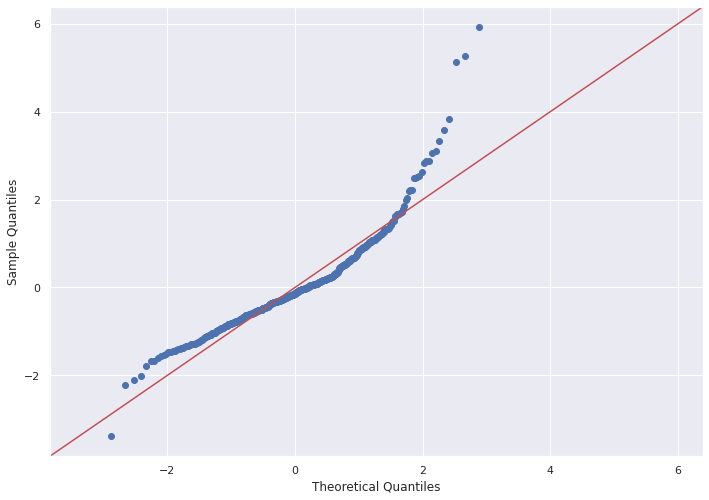

In [70]:
import statsmodels.api as sm
from matplotlib import pyplot as plt
sm.qqplot(a,fit=True,line='45')
plt.show()